In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
li = []
for filename in os.listdir('data/input'):
    df = pd.read_csv("data/input/{filename}".format(filename=filename))
    li.append(df)
sim_df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
print(sim_df.head())

   Iteration  Threads   Trials  Probability  MegaTrialsPSec  MaxPerformance
0          1        2  2500000         0.13           85.68           85.68
1          2        2  2500000         0.13           85.72           85.72
2          3        2  2500000         0.13           86.26           86.26
3          4        2  2500000         0.13           84.56           86.26
4          5        2  2500000         0.13           83.21           86.26


In [4]:
print(sim_df[:12][['Iteration', 'Threads']])

    Iteration  Threads
0           1        2
1           2        2
2           3        2
3           4        2
4           5        2
5           6        2
6           7        2
7           8        2
8           9        2
9          10        2
10          1        1
11          2        1


In [5]:
sim_df = sim_df[sim_df['Iteration'] == 10]
results_df = sim_df[['Trials', 'Threads', 'MaxPerformance', 'Probability']]
results_df = results_df.sort_values(['Trials', 'Threads'])
results_df.to_csv('data/output/results.csv', index=False)
results_df

,Trials,Threads,MaxPerformance,Probability
29,0,1,0.00,0.00
39,0,2,0.00,0.00
59,0,3,0.00,0.00
139,0,4,0.00,0.00
19,500000,1,43.72,0.13
219,500000,2,86.44,0.13
109,500000,3,129.31,0.13
99,500000,4,170.34,0.13
79,1000000,1,43.67,0.13
199,1000000,2,86.75,0.13


In [6]:
unique_threads = results_df['Threads'].unique()
unique_threads.sort()
unique_threads

array([1, 2, 3, 4])

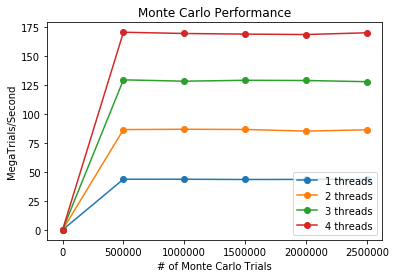

<Figure size 432x288 with 0 Axes>

In [7]:
# plot MegaTrials/Second vs # of Trials
plt.clf()
for threads in unique_threads:
    df = results_df[results_df['Threads'] == threads]
    df = df.sort_values('Trials')
    x = df['Trials'].values
    y = df['MaxPerformance'].values
    plt.plot(x, y, marker='o', label='{} threads'.format(threads))
plt.xlabel('# of Monte Carlo Trials')
plt.ylabel('MegaTrials/Second')
plt.title('Monte Carlo Performance')
plt.legend()
plt.show()
plt.savefig('data/output/mts_vs_trials.png')

In [8]:
unique_trials = results_df['Trials'].unique()
unique_trials.sort()
unique_trials

array([      0,  500000, 1000000, 1500000, 2000000, 2500000])

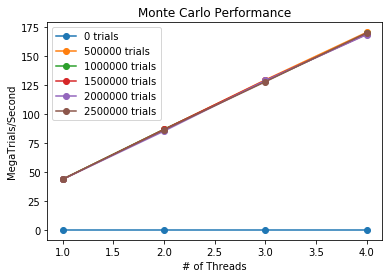

<Figure size 432x288 with 0 Axes>

In [9]:
# plot MegaTrials/Second vs # of Threads
plt.clf()
unique_trials = results_df['Trials'].unique()
unique_trials.sort()
for trials in unique_trials:
    df = results_df[results_df['Trials'] == trials]
    df = df.sort_values('Threads')
    x = df['Threads'].values
    y = df['MaxPerformance'].values
    plt.plot(x, y, marker='o', label='{} trials'.format(trials))
plt.xlabel('# of Threads')
plt.ylabel('MegaTrials/Second')
plt.title('Monte Carlo Performance')
plt.legend()
plt.show()
plt.savefig('data/output/mts_vs_threads.png')

In [10]:
# print estimated probability
'Estimate of actual probability = {}'.format(results_df['Probability'].values[-1])

'Estimate of actual probability = 0.13'

In [11]:
# calculate fp
t1 = results_df[results_df['Threads'] == 1]['MaxPerformance'].values[-1]
t1

43.61

In [12]:
t4 = results_df[results_df['Threads'] == 4]['MaxPerformance'].values[-1]
t4

169.89

In [13]:
speedup = t4 / t1
speedup

3.8956661316211876

In [14]:
fp = (4/3) * (1 - (1/speedup))
'Parallel Fraction = {}'.format(fp)

'Parallel Fraction = 0.9910726548551022'